<a href="https://colab.research.google.com/github/Anastasia5155/About-me/blob/main/%D0%9B%D0%B0%D0%B1%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

t         x_e      v_e     e_e     de_e         x_ec     v_ec    e_ec    de_ec
0.00      1.0000  0.0000  4.5000  0.0000       1.0000  0.0000  4.5000  0.0000 
0.01      1.0000  -0.0900  4.5041  0.0009       0.9991  -0.0900  4.4960  0.0009 
0.02      0.9991  -0.1800  4.5081  0.0018       0.9973  -0.1799  4.4919  0.0018 
0.03      0.9973  -0.2699  4.5122  0.0027       0.9946  -0.2697  4.4879  0.0027 
0.04      0.9946  -0.3597  4.5162  0.0036       0.9910  -0.3592  4.4840  0.0036 
0.05      0.9910  -0.4492  4.5203  0.0045       0.9865  -0.4484  4.4801  0.0044 
0.06      0.9865  -0.5384  4.5244  0.0054       0.9812  -0.5372  4.4763  0.0053 
0.07      0.9811  -0.6272  4.5284  0.0063       0.9749  -0.6255  4.4726  0.0061 
0.08      0.9749  -0.7155  4.5325  0.0072       0.9678  -0.7132  4.4689  0.0070 
0.09      0.9677  -0.8032  4.5366  0.0081       0.9598  -0.8003  4.4654  0.0077 
0.10      0.9597  -0.8903  4.5407  0.0090       0.9509  -0.8867  4.4621  0.0085 
0.11      0.9508  -0.9767  4.544

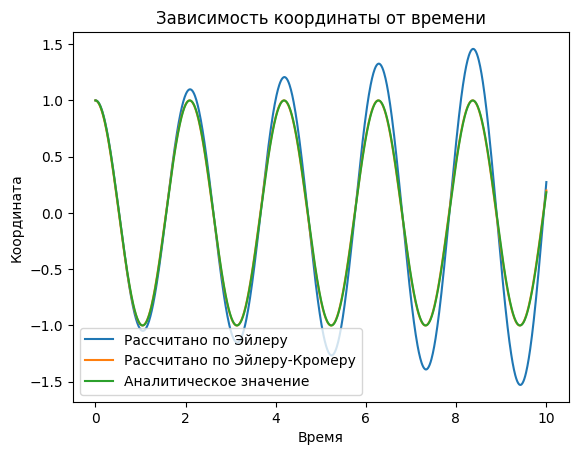

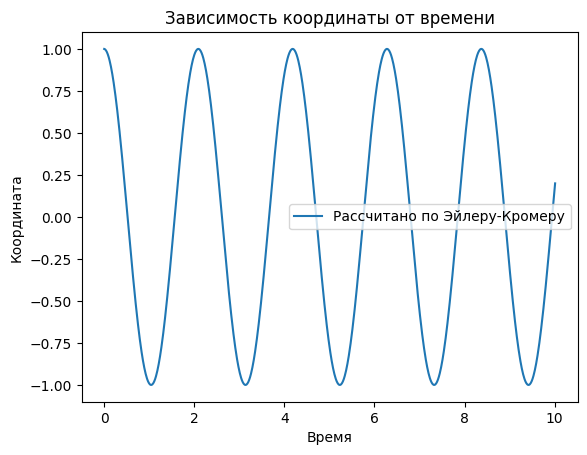

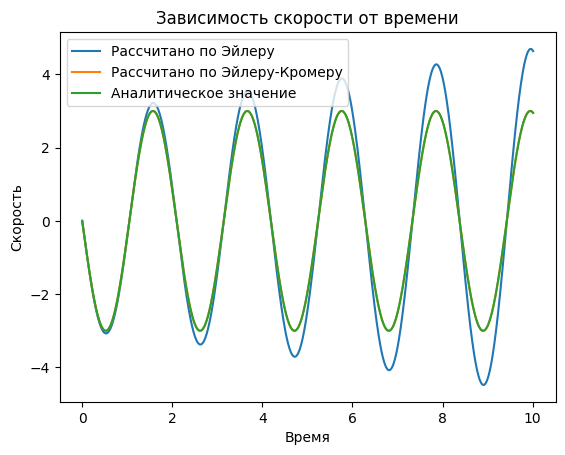

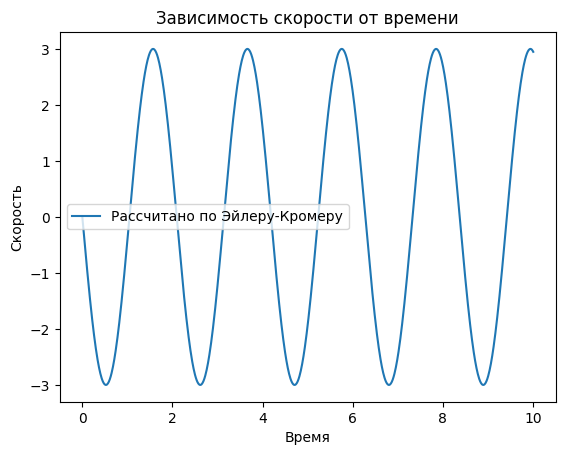

In [ ]:
# Метод Эйлера-Кромера
import math
import matplotlib.pyplot as plt

t0 = 0         # начальное время
dt = 0.01      # шаг времени
tmax = 10  # максимальное время
x0 = 1   # начальная координата
v0 = 0   # начальная скорость
w02 = 9   # квадрат частоты осциллятора

# задаем функции fx и fv, которые возвращают производные координаты и скорости соответственно.
def fx(v):
  return v

def fv(x):
  return -w02*x

# функция для решения методом эйлера
def eiler(x, v, h):
  x1 = x + h*v
  v1 = v + h*fv(x)
  return x1, v1

# функция для решения методом эйлера-кромера
def eiler_cromer(x, v, h):
  v1 = v + h*fv(x)
  x1 = x + h*v1
  return x1, v1

#  функция для вычисления энергии системы.
def energy(x, v):
  return (v**2 + w02*x**2)/2

# задаем функции exactx и exactv, которые вычисляют аналитические значения координаты и скорости в зависимости от времени.
def exactx(t):
  return x0*math.cos(math.sqrt(w02)*t)

def exactv(t):
  return -x0*math.sqrt(w02)*math.sin(math.sqrt(w02)*t)

# задаем функции graphx и graphv, которые строят графики зависимости координаты и скорости от времени.
def graphx(x1, y1):
  plt.plot(x1, y1)
  plt.xlabel('Время')
  plt.ylabel('Координата')
  plt.title('Зависимость координаты от времени')

def graphv(x1, y1):
  plt.plot(x1, y1)
  plt.xlabel('Время')
  plt.ylabel('Скорость')
  plt.title('Зависимость скорости от времени')

#  сравниваем численные решения с аналитическими значениями и выводим результаты.
def comp(i, x, v, x1, v1):
  print("%.2f    " % i, "%.4f  " % x, "%.4f  " % v, "%.4f   " % abs(exactx(i)-x), "%.4f         " % abs(exactv(i)-v), "%.4f  " % x1, "%.4f  " % v1, "%.4f   " % abs(exactx(i)-x1), "%.4f  " % abs(exactv(i)-v1))

# output, выводит информацию о времени, координате, скорости, энергии и относительной погрешности для численных решений и аналитических значений.
def output(t, x, v, x1, v1):
  print("%.2f     " % t, "%.4f " % x, "%.4f " % v, "%.4f " % energy(x, v), "%.4f      " % abs(1 - energy(x0, v0)/energy(x, v)), "%.4f " % x1, "%.4f " % v1, "%.4f " % energy(x1, v1), "%.4f " % abs(1 - energy(x0, v0)/energy(x1, v1)))

#  base, реализует основной алгоритм численного решения уравнения гармонического осциллятора и возвращает массивы времени,
#  координаты и скорости для численных решений и аналитических значений.
def base():
  # Инициализация начальных значений времени t, координаты x и скорости v для численных решений и аналитических значений
  t = t0
  x_e, v_e, x_ec, v_ec = x0, v0, x0, v0

  # Вывод начальных значений t, x_e, v_e, x_ec, v_ec
  print( 't        ', 'x_e     ', 'v_e    ', 'e_e    ', 'de_e        ', 'x_ec    ', 'v_ec   ', 'e_ec   ', 'de_ec')
  output(t, x_e, v_e, x_ec, v_ec)

  # Создание списков для хранения времени, координаты и скорости для численных решений и аналитических значений
  time, crd_e, sp_e, crd_ec, sp_ec = [t], [x0], [v0], [x0], [v0]

  # Цикл, который выполняется до достижения заданного максимального времени tmax
  while t < tmax:
    # Увеличение времени на dt
    t += dt

    # Вычисление новых значений координаты и скорости для численных решений с помощью метода Эйлера
    x_e, v_e = eiler(x_e, v_e, dt)

    # Вычисление новых значений координаты и скорости для аналитических значений с помощью метода Эйлера-Кромера
    x_ec, v_ec = eiler_cromer(x_ec, v_ec, dt)

    # Вывод текущих значений t, x_e, v_e, x_ec, v_ec
    output(t, x_e, v_e, x_ec, v_ec)

    # Добавление текущих значений времени, координаты и скорости для численных решений и аналитических значений в соответствующие списки
    time.append(t)
    crd_e.append(x_e)
    sp_e.append(v_e)
    crd_ec.append(x_ec)
    sp_ec.append(v_ec)

  # Возвращение массивов времени, координаты и скорости для численных решений и аналитических значений
  return time, crd_e, sp_e, crd_ec, sp_ec

# заполнение массивов времени, координаты и скорости для численных решений и аналитических значений
time, crd_e, sp_e, crd_ec, sp_ec = base()

# Вычисляем аналитические значения координаты и скорости в зависимости от времени и сохраняем в массивы x_ex и v_ex
x_ex = [exactx(i) for i in time]
v_ex = [exactv(i) for i in time]


# строим графики
plt.figure()
graphx(time, crd_e)
graphx(time, crd_ec)
graphx(time, x_ex)
plt.legend(['Рассчитано по Эйлеру', 'Рассчитано по Эйлеру-Кромеру', 'Аналитическое значение'])

plt.figure()
graphx(time, crd_ec)
plt.legend([ 'Рассчитано по Эйлеру-Кромеру'])


plt.figure()
graphv(time, sp_e)
graphv(time, sp_ec)
graphv(time, sp_ec)
plt.legend(['Рассчитано по Эйлеру', 'Рассчитано по Эйлеру-Кромеру', 'Аналитическое значение'])

plt.figure()
graphv(time, sp_ec)
plt.legend(['Рассчитано по Эйлеру-Кромеру'])

Оптимальное значение r:  0.043


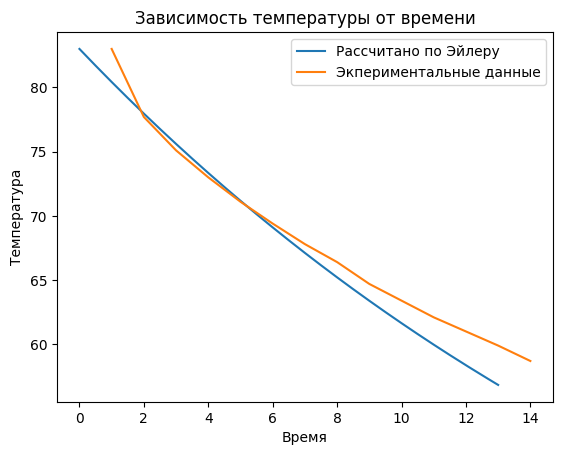

In [ ]:
# Уравнение теплопроводности

import math
import matplotlib.pyplot as plt

t0 = 0 # начальное время
ts = 22 # задержка
temp_0 = 83 # начальная температура

temp_exp = [83, 77.7, 75.1, 73, 71.1, 69.4, 67.8, 66.4, 64.7, 63.4, 62.1, 61, 59.9, 58.7]  # экспериментальные данные

# dt шаг
tmax, dt = 13, 0.1
#r = 0.1

def f(x, r, ts):
    return -r*(x-ts)

# вычисляем приближенное значение решения на следующем временном шаге
def eiler(x, h, r, ts):
    return x + h*f(x, r, ts)

# вычисляем температуру на каждом временном шаге и возвращаем массив времени t и массив температур
def base(r):
    t = [ t0 + dt*i for i in range(int((tmax-t0)/dt)+1) ]
    temp = [temp_0, ]
    for i in range(1, len(t)):
        temp.append( eiler(temp[-1], dt, r, ts)  )
    return t, temp

# находим квадрат разности между значениями на каждом временном шаге
def summ_sq(x1, x2, t):
    count = 0
    n = 0
    for i in range(len(x1)):
        if t[i]==round(t[i]):
            count += (x1[i]-x2[n])**2
            n+=1
    return count

# находим оптимальное значение параметра r для данного метода, минимизирующее квадрат разности между
# численными значениями температуры и эксп данными
def find_opt():
    r = 0.001
    t, temp = base(r)
    count = summ_sq(temp, temp_exp, t)
    while r <= 1:
        r += 0.001
        t, temp = base(r)
        if count > summ_sq(temp, temp_exp, t):
            count = summ_sq(temp, temp_exp, t)
            r_opt = r
    print('Оптимальное значение r: ', "%.3f" % r_opt)
    return r_opt

# задаем аналитическое решение уравнения теплопроводности
def temp_acc(x):
    return ts+(temp_0-ts)*math.e**(-r*x)

#
def output(x1, x2):
    print('Время   ', 'Рассчитанная температура  ', 'Аналитическое решение      ', 'Разница с аналитическим решением')
    for i in range(len(x1)):
        print(str("%.2f" % x1[i]).ljust(8), str("%.5f" % x2[i]).ljust(26), str(temp_acc(x1[i])).ljust(27), abs(x2[i]-temp_acc(x1[i])))

def graph(x1, x2):
  plt.plot(x1, x2)
  t_exp = [i for i in range(1,15)]
  plt.plot(t_exp, temp_exp)
  plt.legend(['Рассчитано по Эйлеру', 'Экпериментальные данные'])
  plt.xlabel('Время')
  plt.ylabel('Температура')
  plt.title('Зависимость температуры от времени')

r = find_opt()
t, temp = base(r)
#output(t, temp)
graph(t, temp)

[0.36207967529619367, 0.1788660277632772, 0.08890088679317643, 0.03543405443392089, 0.01769609309494058]


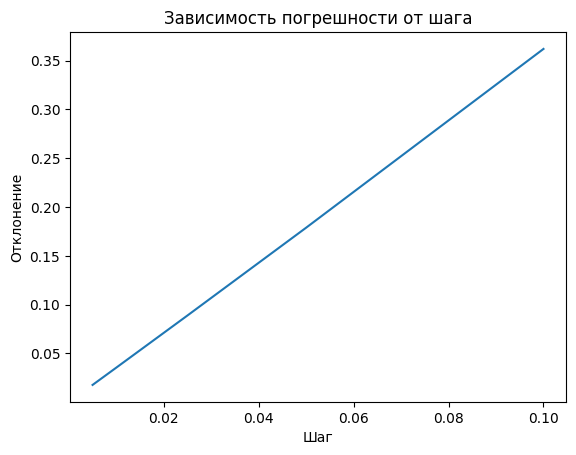

In [ ]:
#Варьирование шага по времени

import math
import matplotlib.pyplot as plt


t0 = 0
ts = 22 # задержка по времени
temp_0 = 83

tmax, r = 1, 0.42
delt_t = [0.1, 0.05, 0.025, 0.01, 0.005]  # список шагов для численного решения ур-я

def f(x, r, ts):
    return -r*(x-ts)

# вычисляем приближенное значение решения на следующем временном шаге
def eiler(x, h, r, ts):
    return x + h*f(x, r, ts)

# ищем температуру на каждом временном шаге и возвращаем в массив времени и массив температур
def base(r, dt):
    t = [ t0 + dt*i for i in range(int((tmax-t0)/dt)+1) ]
    temp = [temp_0, ]
    for i in range(1, len(t)):
        temp.append( eiler(temp[-1], dt, r, ts)  )
    return t, temp

# задаем аналитическое решение ур-я теплопроводности
def temp_acc(x):
    return ts+(temp_0-ts)*math.e**(-r*x)

# отклонение между численными знач temp и аналитическим решением на каждом временном шаге
# для каждого шага delt_t и возвращает список отклонений summ_sq
def vary():
  summ_sq = []

  for i in delt_t:
    t, temp = base(r, i)
    summ_sq.append(abs(temp[-1]-temp_acc(t[-1])))
  return summ_sq

plt.plot(delt_t, vary())
plt.xlabel('Шаг')
plt.ylabel('Отклонение')
plt.title('Зависимость погрешности от шага')
print(vary())
